## Problem Statement

Nowadays, we need recommender systems almost everywhere in our lives. Therefore, retailers are become more interested in recommender systems to analyze patterns of user interest in products and provide personalized recommendations. The first goal of this project is understanding, analyzing, and correlating the trend in average rating movies of different genres from 1995-2015. The second goal is building a recommender engine to predict the rating of each movie. 

## Business Objective

The recommender system is useful to any business that makes money via recommendations. Since we want to work with movie dataset, the client of this project could be Amazon, Netflix, Hulu, HBO, etc. 
Giving good recommendations will help users spend less time searching for their type of movie and having a recommender platform. This will help the customer to continue with the service and having a good experience.

## Data

Two data set have been used for this project:

1- The first data set has been collected from a free, noncommercial movie recommender MoviLens.org. (https://grouplens.org/datasets/movielens) This recommender is like Netflix, minus the ability to watch movies. The dataset which was released in April 2015 contains 20 million ratings and 465,000 tag applications applied to 27,000 movies by 138,000 users (movies.csv, ratings.csv, link.csv). The data has been created in October 2016. Users were selected at random for inclusion. All selected users had rated at least 20 movies. 

2- The second data set is from https://www.kaggle.com/karrrimba/movie-metadatacsv 

## Solution

- **How to get the insight about how people’s rating change for different genres over the years?**

Getting different distributions of the movie-ratings and  movie-relevancy across title, genre, year, and tag of each movie can give the insight about how people’s taste vary over the years. Different inferential statistics and visualization techniques can be implemented to deliver a better understanding of the trends.
 
- **How to predict the rating?**

In this work Collaborative filtering (CF) techniques will be used to analyze relationships between users and interdependencies among products to identify new user-item associations. Most CF algorithms are based on a user-item rating matrix where each row represents a user, each column an item. The entries of this matrix are ratings given by users to items. One of the primary areas of collaborative filtering is the latent factor models which 

## Import libraries, Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the data**

In [2]:
r=pd.read_csv('ratings.csv')
r.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [3]:
movies=pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Data Wrangling

In [4]:
movies['genres'] = movies['genres'].str.split('|')
movies['year']=movies['title'].str[-5:-1]
movies=movies[(movies['title'].str[-1]==')')&(movies['title'].str[-6]=='(')] #drop the movies without year in title
movies.year=pd.to_numeric(movies.year)
movies['Decade']=movies['year']//10 *10
movies=movies.set_index('movieId')
movies.sort_values('year').head() 

,title,genres,year,Decade
movieId,,,,
129851,Dickson Greeting (1891),[(no genres listed)],1891,1890
95541,Blacksmith Scene (1893),[(no genres listed)],1893,1890
94951,Dickson Experimental Sound Film (1894),[Musical],1894,1890
88674,Edison Kinetoscopic Record of a Sneeze (1894),[Documentary],1894,1890
120869,Employees Leaving the Lumière Factory (1895),[Documentary],1895,1890


** Seperating each Genre**

In [5]:
sep = movies.reset_index().set_index(['movieId','title','year'])['genres'].apply(pd.Series).stack()
sep = sep.reset_index()
sep.columns=['movieId','title','year','level','genres']
sep.to_csv('sep.csv')
print('Available Genres: ',sep.genres.unique())
sep.head()

Available Genres:  ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir' '(no genres listed)']


,movieId,title,year,level,genres
0,1,Toy Story (1995),1995,0,Adventure
1,1,Toy Story (1995),1995,1,Animation
2,1,Toy Story (1995),1995,2,Children
3,1,Toy Story (1995),1995,3,Comedy
4,1,Toy Story (1995),1995,4,Fantasy


# Exploratory Data Analysis (Story telling)

**Total number of movies of each Genre**

*Drama, Comedy, and Thriller have the most production.*


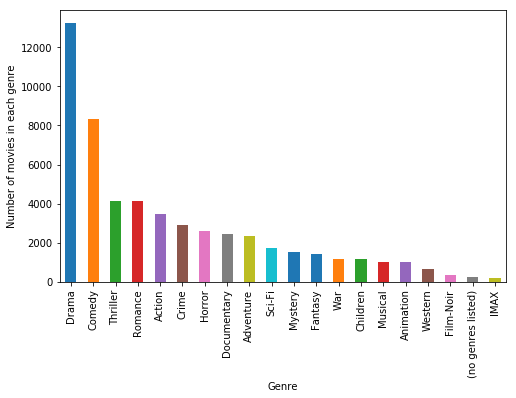

In [6]:
plt.figure(figsize=(8,5))
sep['genres'].value_counts().plot(kind='bar')
plt.ylabel('Number of movies in each genre')
plt.xlabel('Genre')
plt.show()

**Total number of movies in each decade**

*Most production was in 2000 decade*

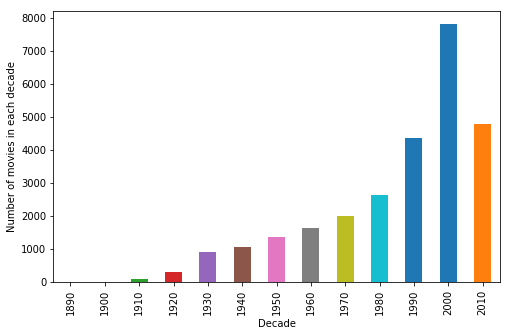

In [7]:
plt.figure(figsize=(8,5))
movies['Decade'].value_counts().sort_index().plot(kind='bar') 
plt.xlabel('Decade')
plt.ylabel('Number of movies in each decade')
plt.show()

**3 years with most Drama Genre**

*Most drama movies produced in 2009, 2007, and 2008 respectively*

In [8]:
sep[sep['genres']=='Drama']['year'].value_counts().head(3) 

2009    505
2007    473
2008    462
Name: year, dtype: int64

**Number of drama movies in each decade**

*Most drama movies produced in 2000 decade*

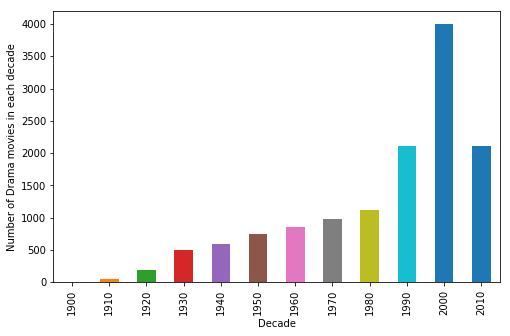

In [9]:
plt.figure(figsize=(8,5))
sep['Decade']=sep['year']//10 *10
sep[sep['genres']=='Drama']['Decade'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Decade')
plt.ylabel('Number of Drama movies in each decade')
plt.show()

** Movies with same title including the year**

*16 movies with same title*

In [10]:
sum(movies['title'].value_counts()>1)

16

**These movies which have repeated twice including the year**

In [11]:
movies['title'].value_counts().head(16) 

Casanova (2005)                        2
Johnny Express (2014)                  2
20,000 Leagues Under the Sea (1997)    2
Paradise (2013)                        2
Men with Guns (1997)                   2
War of the Worlds (2005)               2
Chaos (2005)                           2
Aladdin (1992)                         2
Darling (2007)                         2
Hamlet (2000)                          2
Offside (2006)                         2
Beneath (2013)                         2
Blackout (2007)                        2
Emma (1996)                            2
Clear History (2013)                   2
Girl, The (2012)                       2
Name: title, dtype: int64

**These movie titles (excluding the year in the title) have been repeated several times **

In [12]:
movies['Name']=movies['title'].str[:-7] #removing the year from title
movies['Name'].value_counts().head(20) 

Misérables, Les                   9
Hamlet                            8
Three Musketeers, The             7
Alice in Wonderland               6
Christmas Carol, A                6
Wuthering Heights                 6
Jane Eyre                         5
Cinderella                        5
The Count of Monte Cristo         4
Carrie                            4
Paradise                          4
Hound of the Baskervilles, The    4
King Solomon's Mines              4
Cargo                             4
Oliver Twist                      4
20,000 Leagues Under the Sea      4
Emma                              4
Angel                             4
Dr. Jekyll and Mr. Hyde           4
Maniac                            4
Name: Name, dtype: int64

8 movies have been produced with the title 'Hamlet', The following barplot shows the number of 'Hamlet' movies in each decade.

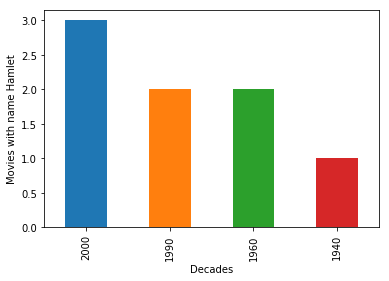

In [13]:
movies[movies.Name=='Hamlet'].sort_values(by='Decade').Decade.value_counts().plot(kind='bar')
plt.xlabel('Decades')
plt.ylabel('Movies with name Hamlet')
plt.show()


9 movies has been produced with title 'Misérables, Les'. The following barplot shows the number of 'Misérables, Les' movies in each decade. 

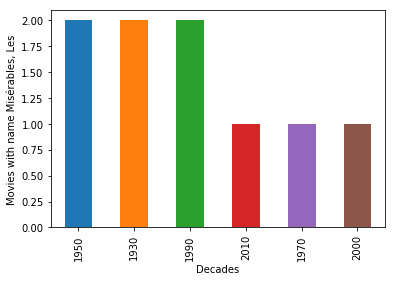

In [14]:
movies[movies.Name=='Misérables, Les'].sort_values(by='Decade').Decade.value_counts().plot(kind='bar')
plt.xlabel('Decades')
plt.ylabel('Movies with name Misérables, Les')
plt.show()

**The most ratings are 4, 3 and 5 respectively.** 

It means people rate their favorite movies more.

In [15]:
r.rating.value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

** Movies with highest number of ranking from 4 to 5.**

**Rank 5**
   *As it was expected, Shawshank Redemption, Pulp Fiction and Silence of the Lambs are the first three.*

**Rank 4.5**
*The first three are, Shawshank Redemption, Matrix, and Pulp Fiction.*

**Rank 4**
*The first three are, Silence of the Lambs, Fugitive, and Jurassic.*


In [16]:
List=[]
for i in np.arange(4,5.5, 0.5):
    M=movies.loc[r[r.rating==i].movieId.value_counts().head(10).index,'title']
    print('Rate: %f' %i)
    print(M)
    print(' ')

Rate: 4.000000
593             Silence of the Lambs, The (1991)
457                         Fugitive, The (1993)
356                          Forrest Gump (1994)
480                         Jurassic Park (1993)
589            Terminator 2: Judgment Day (1991)
150                             Apollo 13 (1995)
1                               Toy Story (1995)
296                          Pulp Fiction (1994)
32     Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
110                            Braveheart (1995)
Name: title, dtype: object
 
Rate: 4.500000
318                      Shawshank Redemption, The (1994)
2571                                   Matrix, The (1999)
296                                   Pulp Fiction (1994)
2959                                    Fight Club (1999)
4993    Lord of the Rings: The Fellowship of the Ring,...
5952        Lord of the Rings: The Two Towers, The (2002)
7153    Lord of the Rings: The Return of the King, The...
50                             Usual Suspects

**Average rating for the 'Shawshank Redemption**

In [17]:
r[r.movieId==318].rating.mean()  #Average rating for the 'Shawshank Redemption, The'

4.446990499637029

**Average rating for the 'Pulp Fiction'**

In [18]:
r[r.movieId==296].rating.mean() #Average rating for 'Pulp Fiction' 

4.174231169217055

**The movies with the max number of rating**

*Pulp Fiction, Forrest Gump, Shawshank redemption respectively*

In [19]:
MaxRating=r['movieId'].value_counts().head(10)

In [20]:
movies.loc[MaxRating.index,'title'] 

296                           Pulp Fiction (1994)
356                           Forrest Gump (1994)
318              Shawshank Redemption, The (1994)
593              Silence of the Lambs, The (1991)
480                          Jurassic Park (1993)
260     Star Wars: Episode IV - A New Hope (1977)
110                             Braveheart (1995)
589             Terminator 2: Judgment Day (1991)
2571                           Matrix, The (1999)
527                       Schindler's List (1993)
Name: title, dtype: object

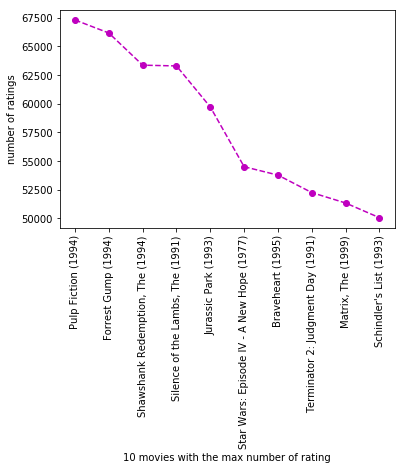

In [21]:
plt.plot(range(len(MaxRating)), MaxRating,'mo--')
plt.xticks(range(len(MaxRating)), movies.loc[MaxRating.index,'title'],rotation=90)
plt.xlabel('10 movies with the max number of rating')
plt.ylabel('number of ratings')
plt.show()

*The movies with the highest average rating are:*

**Pulp Fiction, Forrest Gump, Shawshank redemption** respectively

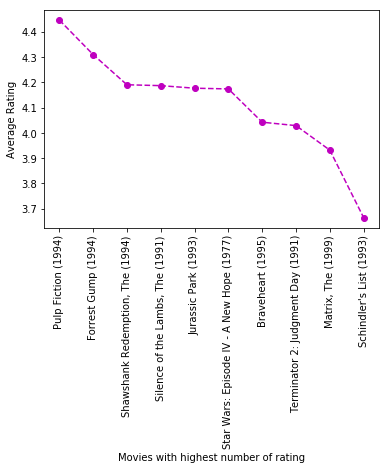

In [22]:
List5=[]
for i in MaxRating.index:
    List5.append(r[r.movieId==i].rating.mean())
plt.plot(range(len(List5)), sorted(List5,reverse=True),'mo--')
plt.xticks(range(len(List5)), movies.loc[MaxRating.index,'title'],rotation=90)
plt.xlabel('Movies with highest number of rating')
plt.ylabel('Average Rating')
plt.show()

**3972 movies just rated once**

In [23]:
MinRating=r['movieId'].value_counts()
MinRating=MinRating[MinRating==1]
print('Number of movies which are rated once:',movies.loc[MinRating.index,'title'].shape) 

Number of movies which are rated once: (3972,)


C:\Python\Anaconda3\lib\site-packages\pandas\core\indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


**Merge movie and rating data frames.**

In [24]:
r1= r.merge(sep.reset_index(), left_on='movieId', right_on='movieId', how='inner')
del r1['timestamp']
r1.head() #merge sep and rating

,userId,movieId,rating,index,title,year,level,genres,Decade
0,1,2,3.5,5,Jumanji (1995),1995,0,Adventure,1990
1,1,2,3.5,6,Jumanji (1995),1995,1,Children,1990
2,1,2,3.5,7,Jumanji (1995),1995,2,Fantasy,1990
3,5,2,3.0,5,Jumanji (1995),1995,0,Adventure,1990
4,5,2,3.0,6,Jumanji (1995),1995,1,Children,1990


**Boxplot of 'Decade' and 'Rating'**

*movies of 40th decade has the highest rating*

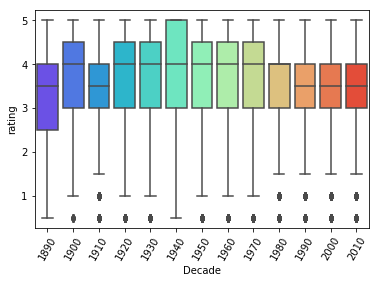

In [25]:
sns.boxplot(x='Decade', y='rating', data=r1,palette='rainbow')
plt.xticks(rotation=60)
plt.show()

**Boxplot of the 'Decade' vs 'Genres'**

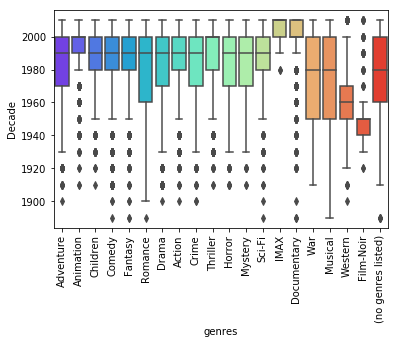

In [26]:
sns.boxplot(x='genres', y='Decade', data=sep,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

**Average rating of the ppl with highest number of rating**

In [27]:
ID=r1.userId.value_counts().head(10) #UserID wih highest number of rating
List5=[]
for i in ID.index:
    List5.append(r1[r1.userId==i]['rating'].mean())

List5

[3.2909304463282605,
 3.2126359112967626,
 1.654984847307483,
 3.026239975083703,
 2.780034504391468,
 3.765411234508289,
 3.4983650780675224,
 3.225420576549159,
 2.4983633387888706,
 3.3196820944366525]

**Boxplot of the 'Genre' vs 'Rating'** 

*Drama, Mystery,Crime, War,Imax, documentary has the highest ratings.Horror is the least favorit*

<function matplotlib.pyplot.show(*args, **kw)>

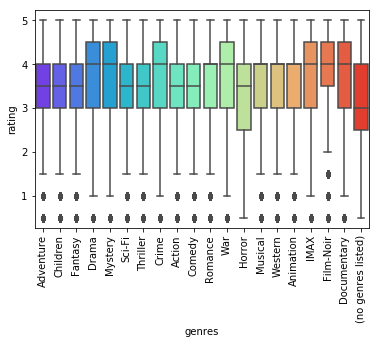

In [28]:
sns.boxplot(x='genres', y='rating', data=r1,palette='rainbow')
plt.xticks(rotation=90)
plt.show

** There is no correlation among the columns**

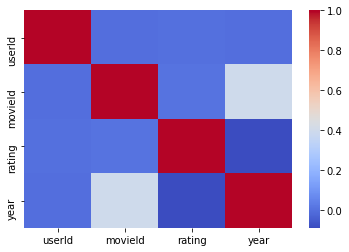

In [29]:
sns.heatmap(r1[['userId','movieId','rating','year']].corr(),cmap='coolwarm')
plt.show()

 ## Title and Overview Wordclouds
** There are certain words that use more often in titles. I use WordCloud library to find out what are these words.** 

The word **Love** is the most commonly used word in movie titles. **Girl**, **Day** and **Man** are also among the most commonly occuring words. 

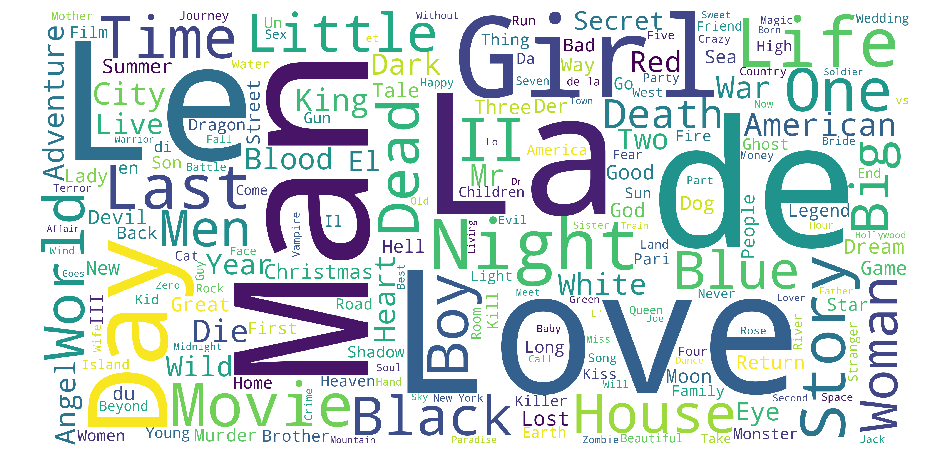

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

movies['title'] = movies['title'].astype('str')

title_corpus = ' '.join(movies['title'])


title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

# Recommender System

In [31]:
movielens=r.drop(['timestamp'],axis=1)

In [32]:
movielens.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
